In [ ]:
# Packages installation

!pip install pandas
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Imports

import io
import pandas as pd
import numpy as np
import statsmodels.api as sm

from statsmodels.formula.api import ols
from google.colab import files

uploaded = files.upload()

Saving metacritic_games_cleaned.csv to metacritic_games_cleaned.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['metacritic_games_cleaned.csv']))
df.head()

,game,platform,developer,genre,rating,release_date,metascore,user_score
0,Portal 2,PC,Valve Software,Action,E10+,"Apr 18, 2011",95,90
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Role-Playing,M,"Nov 10, 2011",94,82
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,Miscellaneous,E10+,"Jun 19, 2011",94,90
3,Batman: Arkham City,PC,Rocksteady Studios,Action Adventure,T,"Nov 21, 2011",91,87
4,Super Mario 3D Land,3DS,Nintendo,Action,E,"Nov 13, 2011",90,84


In [ ]:
stats_subset = df[['release_date', 'metascore', 'user_score' ]]

for index in stats_subset.index:
    stats_subset.loc[index,['release_date']] = stats_subset.loc[index]['release_date'][8:]

stats_subset.head()

,release_date,metascore,user_score
0,2011,95,90
1,2011,94,82
2,2011,94,90
3,2011,91,87
4,2011,90,84


<Axes: title={'center': 'metascore'}, xlabel='release_date'>

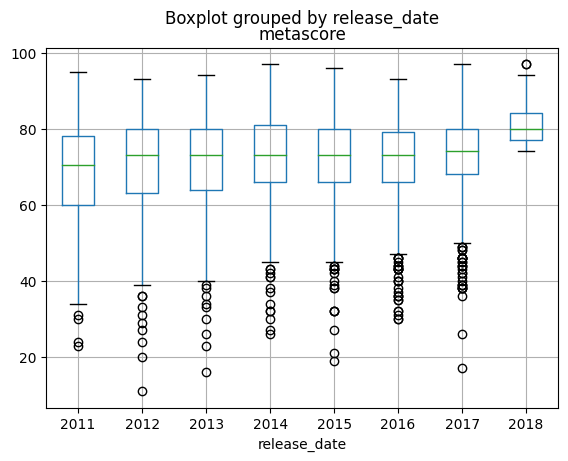

In [23]:
stats_subset.boxplot("metascore", by="release_date")

In [26]:
# Performing one-way ANOVA

model = ols('metascore ~ C(release_date)', data=stats_subset).fit()
result = sm.stats.anova_lm(model, typ=2)

print(result)

if result["PR(>F)"][0] < 0.05:
  print("\nSe considera que existe una diferencia significativa entre las calificaciones otorgadas oficialmente por Metascore de cada año.")
else:
  print("\nSe considera que no existe una diferencia significativa entre las calificaciones otorgadas oficialmente por Metascore de cada año.")

                        sum_sq      df          F        PR(>F)
C(release_date)   42693.516963     7.0  52.054312  4.901298e-72
Residual         584900.178837  4992.0        NaN           NaN

Se considera que existe una diferencia significativa entre las calificaciones de Metascore de cada año.


<Axes: title={'center': 'user_score'}, xlabel='release_date'>

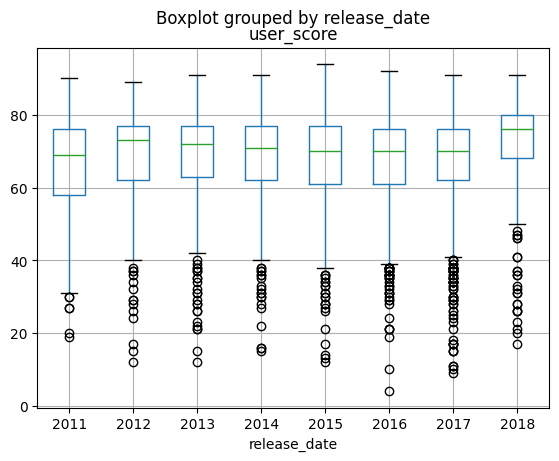

In [22]:
stats_subset.boxplot("user_score", by="release_date")

In [27]:
model = ols('user_score ~ C(release_date)', data=stats_subset).fit()
result = sm.stats.anova_lm(model, typ=2)

print(result)

if result["PR(>F)"][0] < 0.05:
  print("\nSe considera que existe una diferencia significativa entre las calificaciones otorgadas por los usuarios de Metascore de cada año.")
else:
  print("\nSe considera que no existe una diferencia significativa entre las calificaciones otorgadas por los usuarios de Metascore de cada año.")

                        sum_sq      df          F        PR(>F)
C(release_date)   14342.897909     7.0  12.017574  2.702841e-15
Residual         851131.420291  4992.0        NaN           NaN

Se considera que existe una diferencia significativa entre las calificaciones de los usuarios de Metascore de cada año.
